<a href="https://colab.research.google.com/github/zyin36/MAT-422/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT 422 Final Paper - Project Planning and Agenda Creating AI

### Jacob Letsinger, Zhongsheng "Carter" Yin, Ang Li

# 1. Introduction


Success in academic settings has been an ongoing issue for ages, and while there are many factors that contribute to this problem, time management remains one of the most common challenges students face today. Without of a structured system to guide them in prioritizing the tasks they must complete, they end up procrastinating on assignments, burden by the stress of their courseload, and end up performing suboptimally in the end.

College students, in particular, are not only expected to handle the rigor of their academic coursework, but also have to start learning to how to live on their own, as well as maintain their health and social life in a new environment from the school structured they had been used to for the past 12 years of their lives.

To address these challenges, there has been a growing interest in leveraging technnology to help students with task management so that they can better use their time, especially in the field of AI.

While calenders and task lists have proven to be effective management tools for a long time, their technological equivalents do not necessarily solve the issues these students face. Afterall, they are tools to assist in execution for someone who already understands how to prioritize their time, rather than students who are just starting to learn how to balances all of the work they are assigned.

With the rise of AI and generative models, however, students may finally find a 24/7, easy to use tool they can use to help decide which assignments to begin first, how to break bigger tasks down to managable subtasks, etc.

In this paper, we demonstrate a way to implement an AI agent by leveraging API access to Canvas, a learning management system (LMS), and Gemini 1.5, a large language model (LLM) developed by Google.  We also compare the performance, for our task, of two variants: Flash and Flash-8B, where Flash is a balanced model optimized for general purpose tasks and Flash-8B is a smaller model optimized for highly frequent yet less intelligent tasks.



# 2. Related Work
There are many software solutions for cooperate tasks scheduling and project management by syncing third-party calenders such as Google Calender. Many of them leverage LLM's from third party to provide the user insights based on the task information, such as sentiment and task category.

In terms of education, there are education platforms which use LLM agents for assisting students with certain problems. For example, Edfinity provides "24/7 conversational tutors" (Anna) and "step-by-step homework feedback" (Step-By-Step); pwn.college, a cybersecurity learning platform created by Connor Nelson and Yan Shoshitaishvili of Arizona State University, has a built-in GPT-4-based AI called "SENSAI" which is designed to help students learn the concepts and provide feedback for problem solving. However, as of today, there is no LLM agent for task planning built for any learning management system (LMS). Possible challenges of building a task planning AI agent integrated in a LMS include privacy issues (e.g. using students' homework submissions and feedback for personalization training) and copyright issues (e.g. accessing homework instruction documents created by the instructors). In our demo, we show the behavior of Gemini 1.5 Flash and 8B without fine-tuning or any training except the context prompt.

Outside of education platforms, other developers have also made advances in developing AI agents that assist in task tracking, planning, schedule, and time management in general. Taskade, for example, provides an AI that can provides both task management through tracking assignment due dates, test schedules, project deadlines, and study planning by creating tailored study schedules for different students.

Even outside of educational usage, there are various articles and companies that have started to realize the power of AI in aiding time and task management. Calendly, for example, has now integrated an AI agent into their calendar system that claims to help users schedule their time by learning from their preferences, and also detect different time zones and resolve schedule conflicts with variable teammates. An article from newo.ai also mentions the advantages of AI schedule makers, such as automatic scheduling, smart reminders, integration with other tools, and real-time adjustments. In fact, it actually mentions the AI that calendly has created.

All of these models demonstrate significant advancements in the ability of technology to aide users to better schedule and complete their tasks. One key aspect missing from these existing models, however, are the ability to split tasks into further tasks, and prioritizing them based on difficulty and time estimate, which is the issue that this paper aims to address.

The model created in this paper aims to perform the above stated functionalities of task splitting and prioritization for single tasks found using the canvas API to demonstrate an example of what this type of task and time management could look like, but it can be further applied to each subtask until the user receives a list of final subtasks that are easy enough to approach.


# 3. Proposed Methodology

## 3.1 Prioritizing Tasks and Time Management

There are many ways to accomplish the prioritizing and completion of tasks by a computer. Artificial Intelligence (AI) and Large Language Models (LLM) allow one to easily communicate with the computer using human language and generate solutions to simple problems without needing to solve them oneself. Good examples of simple problems are finding trustworthy research papers on a given topic or writing an email.

LLM's are limited by the size of query (e.g. length of text, size of a picture), the size of the response, the rate of parsing the query and generating the response, and the long term memory of inputs given by the user, and so on. A way of mitigating each of these at once is to have a data structure that the user and the LLM both have access to that contains information about every task completed and to be compeleted by the model. The idea is that this data structure is an organized agenda where the LLM helps with any task the user wants it to (to the best of it's ability).

The LLM should be able to break down an assignment into smaller subtasks, and estimate the time needed based on each subtask. The time it takes to complete an assignment depends on the overall difficulty (for the student), the number of items (e.g. the number of math problems) in the assignment, and how much content is required for each item (for example, an 10-page essay has much more content than a single math problem, in general).

The priority of a task changes with time, as in the case of any task with a deadline where as the deadline approaches the priority should increase. Every task also needs to reach the highest priority at some point in order to be completed, meaning the rules for priority need to ensure no task is left undone. There are certain tasks that need to completed during a certain period of time, for instance a doctor's appointment or watering a plant, that restict when other tasks can be completed since they are of the highest priority when they are happening. No one can predict everything. For example, an emergency might come up while a student is completing homework before a deadline where they want the model to email the professor asking for an extension. This type of task would supersede all others and be the highest priority.

An example algorithm of prioritizing the tasks could be constructed by combining some of these rules and applying them to different task types. The user would need to specify the task type but everything else about it's prioritization is handled by the program. Below is an implementation that prioritizes based on the deadline Deadline-less tasks are added such that the time it would take to complete it and the time it would take to doesn't make it impossible to meet the deadlines in the queue. Thus the the iterated tasks deadline must be greater than the time it would take to complete every
task in the queue plus the time to complete the task being added.



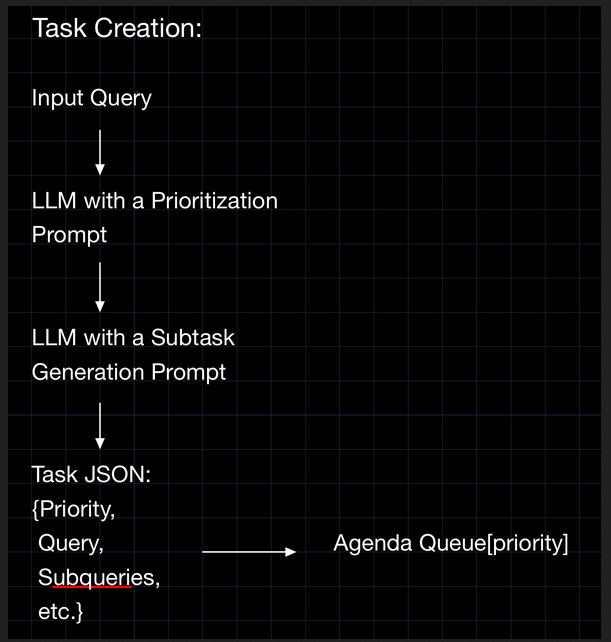

In [ ]:
import google.generativeai as genai
import time

genai.configure(api_key="YOUR_API_KEY")
model = genai.GenerativeModel("gemini-1.5-flash")

class Agenda:

  # Initializes the Agenda with a task array and its length.
  def __init__(self):
    self.tasks = []
    self.total_tasks = len(self.tasks)

  def __repr__(self):
    s = ""
    s += f'{self.total_tasks}'

    for task in self.tasks:
      s += f';{task.priority}:{task.query}'

      for subtask in task:
        s+= f'-{task.subtasks}'

    return

  # Adds a task to the agenda based on a user's query.
  def add_task(self, query):
    priority, difficulty, deadline, estimated_time = self.get_priority(query)
    subtasks = self.get_subtasks(query)

    task = {
        query: query,
        subtasks: subtasks,
        priority: priority,
        difficulty: difficulty,
        deadline: deadline,
        estimated_time: estimated_time
    }

    self.tasks.insert(priority, task)

    return

  # Returns the priority, difficulty, deadline, estimated_time for a task given
  # by a Gemini LLM "gemini-1.5-flash" that parses the query.
  # Priority is ranked by favoring deadline-less tasks far from a deadline and
  # tasks that are close to their deadline, easiest first.
  def get_priority(self, query):
    difficulty = model.generate_content(f'''For the following task {query},
                rank its difficulty on a scale from 0 to 1 compared to
                following other tasks {self.tasks}.''')

    deadline = model.generate_content(f'''For the following task {query},
                find a deadline if the user has specifed and return
                exactly the python time object for it and nothing more.
                If it does not just return None exactly.''')

    estimated_time = model.generate_content(f'''For the following task {query},
                estimate the amount of time it would take to complete and return
                exactly the python time object for it and nothing more.''')

    priority = 0

    # Compares every task to the task being added to find its priority.
    for task in self.tasks:
      # Tasks with deadlines
      if deadline != None and task.deadline != None:
        if task.deadline > deadline:
          priority = task.priority

      # Tasks without deadlines
      else:
        current_estimated_time = 0

        for _ in self.tasks:
          current_estimated_time += _.estimated_time
          if _ == task:
            break

        if task.deadline - current_estimated_time - estimated_time > 0:
          if difficulty > task.difficulty:
            priority = task.priority - 1
          else:
            priority = task.priority

    return priority, difficulty, deadline, estimated_time


  # If implemented, it would use an LLM to break up the problem into multiple
  # smaller queries.
  def get_subtasks(self, query):

    return

  # If implemented, it would raise the priority of tasks without a deadline when
  # every deadline is far enough away for them to still be completed in time as
  # well as any other logic about changes in priority.
  def update_priorities(self):

    return



## 3.2 Example Implementation

Our Python program would first fetch the assignment data using the API of Canvas LMS, then, for each assignment, extracts the instructions any documents related to the assignment, and its due date and time; Then, the program can feed the data to the LLM's API based on the context of the prompt we design; After which, the LLM's API returns the suggested subtasks, their time estimate for completion, and some suggestions for the user.

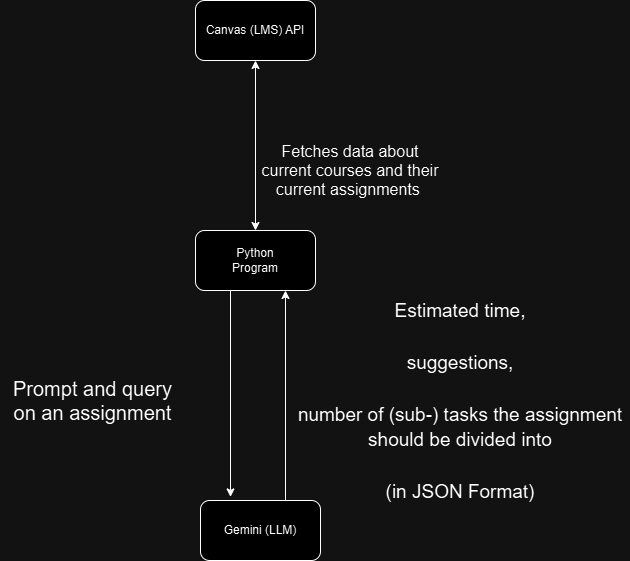

*Workflow diagram for 3.2*

In [ ]:
import requests
import google.generativeai as genai
import typing_extensions as typing_ext
from typing import Iterator
from datetime import datetime
import json

# Read API tokens from files
file = open("canvas_api_token.txt", 'r')
LMS_API_TOKEN = file.readline().strip()
file.close()
file = open("google_ai_api_token.txt", 'r')
AI_API_TOKEN = file.readline().strip()
file.close()
prompt = ""
# Read prompt from file
with open("prompt.txt", 'r') as file:
    prompt = file.read().strip()

# Configurations for the LLM
genai.configure(api_key=AI_API_TOKEN)
# MODEL_STR = "gemini-1.5-flash-002"
MODEL_STR = "gemini-1.5-flash-8b"
# context
cache = genai.caching.CachedContent.create(
    model = MODEL_STR,
    system_instruction=prompt,
)
model = genai.GenerativeModel.from_cached_content(cached_content=cache)

# Authorization header for requests
HEADER = "Bearer " + LMS_API_TOKEN

# For course search filtering
YEAR = '2023'
TERM = 'Fall'

# course id to course number (e.g. CSE 310) mapping
course_dict = {}

class HW_Task:
    course : str
    name: str # name of the assignment
    # due_in: float # in hours
    instructions: str
    def __str__(self):
        s = f"""
        Course: {self.course}
        Assignment: {self.name}
        Instructions: {self.instructions}
        """
        return s


class Response_Subtask(typing_ext.TypedDict):
    name: str
    time_estim: float
    instructions: str
    difficulty: str
    def __str__(self):
        hours = int(self.time_estim)
        minutes = int(self.time_estim * 60) % 60
        s = f"""
        Subtask: {self.name}
        Time Estimate: {hours} hours, {minutes} minutes
        Difficulty: {self.difficulty}
        Instructions: {self.instructions}
        """
        return s

class JSON_Response(typing_ext.TypedDict):
    time_estim: float # time estimate in hours
    suggestions: str # suggestions for the user
    subtasks: list[Response_Subtask]
    difficulty: str
    def __str__(self):
        hours = int(self.time_estim)
        minutes = int((self.time_estim * 60) % 60)
        s = f"""
        Time Estimate: {hours} hours, {minutes} minutes
        Suggestions: {self.suggestions}
        """
        for subtask in self.subtasks:
            s += str(subtask)
        return s


# returns a list of course ids for the given year and term
def get_courses(year, term):
    global course_dict
    url = 'https://canvas.instructure.com/api/v1/courses'
    response = requests.get(url, params={'include[]':'term', 'enrollment_type': 'student'}, headers={'Authorization': HEADER})
    loop = True
    arr = []    # Array of course ids
    while loop:
        for course in response.json():
            try:
                if year in course['term']['name'] and term in course['term']['name']:
                    print(course['name'][:7])
                    arr.append(course['id'])
                    course_dict[course['id']] = course['name'][:7]
            except KeyError:
                pass

        try:    # Check if there is a next page
            url = response.links['next']['url']
            response = requests.get(url, headers={'Authorization': HEADER})
        except KeyError:
            loop = False

    return arr


def fetch_hw_data(course_id) -> Iterator[HW_Task]:
    url = f'https://canvas.instructure.com/api/v1/courses/{course_id}/assignments'
    response = requests.get(url, headers={'Authorization': HEADER})
    loop = True
    while loop:
        for assignment in response.json():
            try:
                hw = HW_Task()
                hw.course = course_dict[assignment['course_id']]
                hw.name = assignment['name']
                # hw.due_in = (datetime.fromisoformat(assignment['due_at']) - CURR_DATETIME).total_seconds() / 3600
                hw.instructions = assignment['description']
                yield hw

            except KeyError:
                pass

        try:    # Check if there is a next page
            url = response.links['next']['url']
            response = requests.get(url, headers={'Authorization': HEADER})
        except KeyError:
            loop = False

def get_value(json_response, key):
    try:
        return json_response[key]
    except KeyError:
        return "Not Given"

def print_response(json_response, hw: HW_Task):
    print(f"Course: {hw.course}")
    print(f"Assignment: {hw.name}")
    print(f"Time Estimate: {json_response['time_estim']} hours")
    print(f"Suggestions: {json_response['suggestions']}")
    if json_response['subtasks']:
        print("Subtasks:")
        for subtask in json_response['subtasks']:
            print(f"{subtask['name']}")
            print(f"\tTime Estimate: {get_value(subtask,'time_estim')} hours")
            print(f"\tDifficulty: {get_value(subtask, 'difficulty')}")
            print(f"\tInstructions: {get_value(subtask, 'instructions')}")
            print()

    print("\n")


def main():
    print("Model = ", MODEL_STR)
    COURSES = get_courses(YEAR, TERM)
    hw = None
    for _hw in fetch_hw_data(COURSES[0]): # get the first assignment found
        hw = _hw
        break

    myfile = genai.upload_file("hw1.pdf")
    response = model.generate_content(
        [str(hw), myfile],
        generation_config=genai.GenerationConfig(
    response_mime_type="application/json", response_schema=JSON_Response),
    )
    json_response = json.loads(response.text)
    print_response(json_response, hw)


if __name__ == '__main__':
    main()


# 4. Experiment Setups and Result Discussion
## Experiment Setup
**The following prompt is used as the context:**<br>
<i>"You are now responsible for estimating how much time it would take and the difficulty of a homework assignment for a college student, given the prompt and pdf, if applicable. You also have to evaluate the difficulty of an assignment, based on the difficulty of the course and the assignment description. Add a little bit of suggestions for the student. You should divide big projects into smaller subtasks, where each task takes at most 1 hour, don't include this instruction in your suggestions A quiz cannot be divided into subtasks. If it is an exam, you should assign the student subtasks for studying them. A submission should take 0.1 hours at most.
Please generate the response in JSON format, and try to give a value for every key, if allowed." </i><br><br>

## Results
The following are outputs from the Python program in 3.2 using Gemini 1.5 Flash (gemini-1.5-flash-002) and Gemini 1.5 Flash 8B (gemini-1.5-flash-8b) when they were given the same context and input prompt and PDF for an assignment for a software development class.
<br>

### Gemini 1.5 Flash

```
Model =  gemini-1.5-flash-002
Course: CSE 445
Assignment: A1 / Project 1 Document and Submission
Time Estimate: 19.1 hours
Suggestions: This assignment requires a good understanding of SOA, SOC, SOD concepts and hands-on experience with web service development.  Start by focusing on understanding the theoretical concepts first. Then, break down the project into smaller, manageable tasks.  Make sure to test each component thoroughly before integrating them.  Use the provided tutorials and examples as a starting point and don't hesitate to seek help from teaching assistants or classmates if you encounter difficulties.
Subtasks:
Concept Understanding
	Time Estimate: 2 hours
	Difficulty: easy
	Instructions: Read and understand the concepts covered in the lectures and textbook, including SOA, SOC, SOD, and their applications in software development.

Tutorial Exercises 1-2
	Time Estimate: 4 hours
	Difficulty: medium
	Instructions: Follow the tutorial to gain hands-on experience in developing a simple service and application using remote web services. Create a simple service using Visual Studio and test it using a WCF test client.

Temperature Conversion Web Service
	Time Estimate: 2 hours
	Difficulty: medium
	Instructions: Develop a temperature conversion web service with two operations (Celsius to Fahrenheit and vice versa).

Number Sorting Web Service
	Time Estimate: 2 hours
	Difficulty: medium
	Instructions: Develop a web service to sort a string of numbers separated by commas.

Web Application Development
	Time Estimate: 3 hours
	Difficulty: medium
	Instructions: Develop a web site application to consume the temperature and number sorting services created in the previous steps.

Web Browser Application with Added Features
	Time Estimate: 5 hours
	Difficulty: medium
	Instructions: Create a web browser application that can take any URL and display the content of the page. Add extra features like a calculator, text encryption/decryption, stock quote function, or image verifier.

External Temperature Web Service Integration
	Time Estimate: 1 hours
	Difficulty: easy
	Instructions: Find and use a temperature web service from an external source and add the temperature to your web browser.

Submission
	Time Estimate: 0.1 hours
	Difficulty: easy
	Instructions: Prepare the final submission by combining all the project files into a single zip file and submit it on Canvas.

```

<br>

### Gemini 1.5 Flash 8B


```
Model =  gemini-1.5-flash-8b
Course: CSE 445
Assignment: A1 / Project 1 Document and Submission
Time Estimate: 18 hours
Suggestions: Break down the project into smaller, manageable tasks. Focus on one task at a time to avoid feeling overwhelmed. Use the provided tutorials as a guide, and refer to the textbook and lecture materials for clarification.  Ask for help if needed, and utilize online resources. Understand the different concepts and functionalities thoroughly. Make sure to thoroughly test each aspect of the solution before submission to avoid any errors or functionality issues. Pay special attention to the submission requirements, following the guidelines from the assignment document to successfully complete the assignment.
Subtasks:
Understanding the assignment
	Time Estimate: 1 hours
	Difficulty: medium
	Instructions: Read the Project 1 document and Tutorial document carefully.

Download and Install Visual Studio
	Time Estimate: 0.5 hours
	Difficulty: medium
	Instructions: Download and install Visual Studio.

Create a simple web service and test it
	Time Estimate: 2 hours
	Difficulty: medium
	Instructions: Create a new project in Visual Studio. Follow the tutorial to create a simple web service. Test the service with the WCF test client.

Create a web application
	Time Estimate: 1.5 hours
	Difficulty: medium
	Instructions: Create a web application to consume the web service created in the previous task.

Develop a number sorting service
	Time Estimate: 1 hours
	Difficulty: medium
	Instructions: Develop a web service to sort a string of numbers. Test the service using the WCF test client.

Create a web site application for number sorting
	Time Estimate: 1 hours
	Difficulty: medium
	Instructions: Develop a web site application to consume the number sorting service.

Add a calculator to the web browser
	Time Estimate: 2 hours
	Difficulty: medium
	Instructions: Add a simple calculator with +, -, *, and / operations to the web browser created in the previous task.

Add text encryption function
	Time Estimate: 2 hours
	Difficulty: medium
	Instructions: Add text encryption decryption function to the web browser.

Add stock quote function
	Time Estimate: 2 hours
	Difficulty: medium
	Instructions: Add Get Stock Quote function to the web browser.

Add CAPTCHA service
	Time Estimate: 2 hours
	Difficulty: medium
	Instructions: Add image verifier (CAPTCHA) service to the web browser.

Add temperature web service
	Time Estimate: 2 hours
	Difficulty: medium
	Instructions: Find a temperature web service and integrate the temperature into the web browser.

Organize project files
	Time Estimate: 1 hours
	Difficulty: medium
	Instructions: Organize all the project files into a single solution folder.

Zip and Submit
	Time Estimate: 0.1 hours
	Difficulty: medium
	Instructions: Zip the solution folder and submit it.


```

## Result Discussion
Both variants of the model overestimated the amount of time for this assignment. For the question below, the LLM listed every "sub question" as a subtask, but only implementing two of them is required. Besides that, the quality of the responses are nearly identical, with Flash providing slightly better suggestions than Flash 8B.

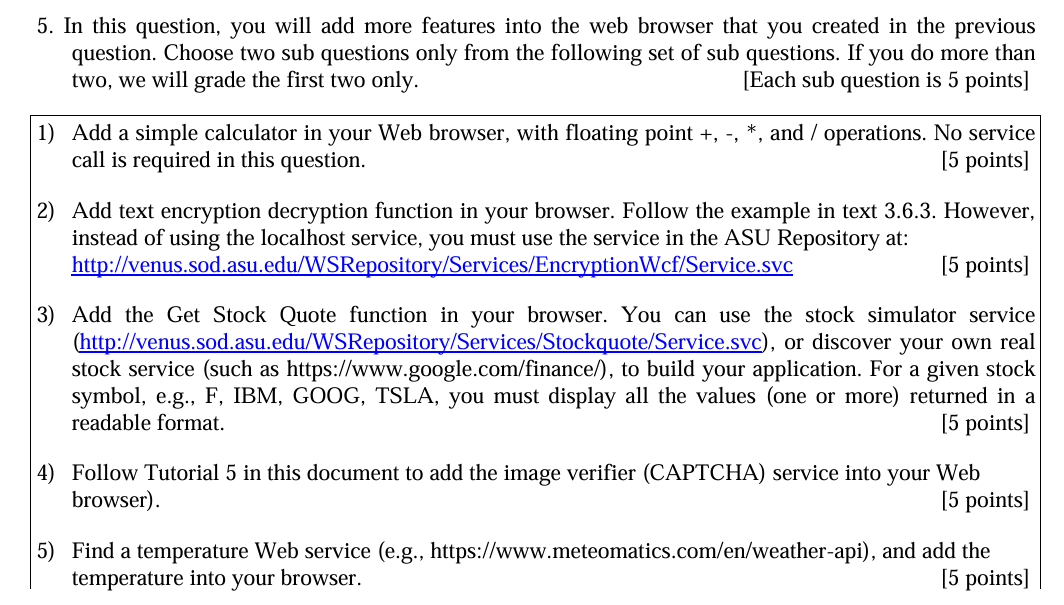







# 5. Comparison

The idea of generating subtasks given the description of a big task is demonstrated in both our demo and *Taskade*, though getting the information of the big tasks is automated in our case, but not in *Taskade*'s.  

Our demo in 3.2 is based on the assumption that the AI agent has access to the user's assignments and all the documents related to them, which is similar to the task management software solutions which integrates third-party calenders and CRM software. Our idea implies that there would be more computation for each user than related work, since there will be more text and documents to process.


# 6. Conclusion
Since the turn of the 21st century, Artificial Intelligence systems have become ubiquitous. Countless problems that would otherwise be infeasible for humans to complete by themselves can be solved effortlessly by these systems. Complicated problems can then by solved by breaking them down into simpler ones that individual AI systems can solve.

This implementation uses that concept to break down tasks defined by the user and build an agenda that the user can follow. It does so by using a Large Language Model to interpret and simplify and prioritize the tasks. This frees the user from having to organize a routine themselves and allows them to work more efficiently. With more functionality and a GUI, a system like this would could be used to make everyday life much easier.  

# 7. Acknowledgments


We thank the developers at Instructure and those at Google who made API access to Canvas and Gemini 1.5 Flash possible, respectively.

# 8. Author Contributions


Carter Yin - 1. Introduction, 2. Related Work, 3.2 Example Implementation, 4. Experiment Setups and Result Discussion, 5. Comparison, 9. Data Availability. 10. References

Jacob Letsinger - 1. Introduction, 3.1 Prioritizing Tasks and Time Management 6. Conclusion

Ang Li - 1. Introduction, 2. Related Work, 10. References

# 9. Data Availability
For assignments, the data availability entirely depends on the user's accessility to courses on the learning management system (LMS) and its  API. For example, a student would have to crawl the assignment data if they don't have access to the LMS's API.


We may fine-tune the LLM based on ideal outputs for certain assignments for our AI agent. However, there are limitations; for example, students who are not familiar with certain concepts would take more time than those who are. Ideally, our AI agent should be personalized, because very student has their strengths and weeknesses. In this case, finding training data is not the only option for personalization. For example, it is possible for users to change their own AI agents' behavior over time by giving feedback in their conversations. It would be difficult for an AI agent to know the exact amount of time that a user spent on an assignment, because doing so requires access to the user's workspace on their computer, which involves getting access to different software. For example, analyzing a student's performance on a programming assignment would require access to a code editor (e.g. Visual Studio Code), and doing the same for an essay would require access to software like Microsoft Word or Google Docs.

# 10. References
1. https://ai.google.dev/gemini-api/docs/models/gemini
2. https://canvas.instructure.com/doc/api/all_resources.html
3. https://ai.google.dev/api?lang=python
4. https://newo.ai/insights/revolutionizing-productivity-how-ai-schedule-makers-enhance-task-management/
5. https://beam.ai/tools/task-planner
6. https://www.akira.ai/ai-agents/calendly-ai-agent
7. https://www.taskade.com/generate/ai-education-and-learning-agent/study-planner-agent
8. https://www.taskade.com/generate/education/student-assignment-tracker